In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 展示图片
def show_img(image):


    if len(image.shape) == 2:  # 如果图像只有高度和宽度，则为灰度图像
        image = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)

    if image is None: print("Error: Unable to load image.")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 使用 Matplotlib 显示图像
        plt.figure(figsize=(6, 6))
        plt.imshow(image_rgb)
        plt.axis('off')  # 关闭坐标轴
        plt.show()


In [37]:


def draw_segment(gray_image, x1, y1, x2, y2, color = (0,0,255)):

    if len(gray_image.shape) == 2:  # 如果图像只有高度和宽度，则为灰度图像
        color_image = cv2.cvtColor(gray_image.copy(), cv2.COLOR_GRAY2BGR)
    else: color_image = gray_image

    x1, y1, x2, y2, = int(x1), int(y1), int(x2), int(y2)
    x1, y1 = x1, color_image.shape[1] - y1
    x2, y2 = x2, color_image.shape[1] - y2
    cv2.line(color_image, (x1, y1), (x2, y2), color, thickness=2)
    return color_image


In [49]:
def cross(x1, y1, x2, y2):
    return x1 * y2 - x2 * y1

def dot(x1, y1, x2, y2):
    return x1 * x2 + y1 * y2

def rotate(x, y, alpha):
    x_rot = x * np.cos(alpha) - y * np.sin(alpha)
    y_rot = x * np.sin(alpha) + y * np.cos(alpha)
    return x_rot, y_rot

# 初始化图像和参数
img = np.zeros((512, 512))  # 使用浮点数类型初始化图像
x0, y0 = 256, 256
xp, yp = 100, 100

alpha = np.radians(45)
scan_zone_r = 30

# 计算旋转后的坐标
xp1, yp1 = rotate(xp - x0, yp - y0, alpha)
xp1, yp1 = xp1 + x0, yp1 + y0

xp2, yp2 = rotate(xp - x0, yp - y0, -alpha)
xp2, yp2 = xp2 + x0, yp2 + y0


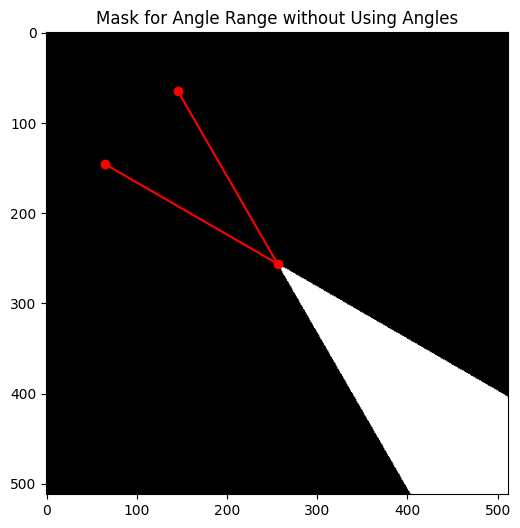

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def cross(x1, y1, x2, y2):
    return x1 * y2 - x2 * y1

def dot(x1, y1, x2, y2):
    return x1 * x2 + y1 * y2

def rotate(x, y, alpha):
    x_rot = x * np.cos(alpha) - y * np.sin(alpha)
    y_rot = x * np.sin(alpha) + y * np.cos(alpha)
    return x_rot, y_rot

# 初始化图像和参数
img_shape = (512, 512)
x0, y0 = 256, 256  # 中心点坐标
xp, yp = 100, 100  # 给定点坐标

alpha = np.radians(15)  # 角度
scan_zone_r = 30  # 扫描范围

# 计算旋转后的坐标
xp1, yp1 = rotate(xp - x0, yp - y0, alpha)
xp1, yp1 = xp1 + x0, yp1 + y0

xp2, yp2 = rotate(xp - x0, yp - y0, -alpha)
xp2, yp2 = xp2 + x0, yp2 + y0

# 生成网格点
Y, X = np.meshgrid(np.arange(img_shape[0]), np.arange(img_shape[1]))

# 计算相对于中心点的偏移
X_shifted = X - x0
Y_shifted = Y - y0

# 计算向量 (x0, y0) -> (xp1, yp1) 和 (x0, y0) -> (xp2, yp2)
v1_x, v1_y = xp1 - x0, yp1 - y0
v2_x, v2_y = xp2 - x0, yp2 - y0

# 判断每个点是否在夹角范围内
# 计算点 (X, Y) 相对于 (x0, y0) 的向量 (X_shifted, Y_shifted)
cross_prod1 = cross(v1_x, v1_y, X_shifted, Y_shifted)
dot_prod1 = dot(v1_x, v1_y, X_shifted, Y_shifted)

cross_prod2 = cross(v2_x, v2_y, X_shifted, Y_shifted)
dot_prod2 = dot(v2_x, v2_y, X_shifted, Y_shifted)

# 点与直线 (x0, y0) -> (xp1, yp1) 和 (x0, y0) -> (xp2, yp2) 的夹角应当满足以下条件：
# 1. 叉积和点积符号的关系满足夹角条件
mask = (cross_prod1 >= 0) & (cross_prod2 <= 0)

# 可视化结果
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.scatter([x0, xp1, xp2], [y0, yp1, yp2], color='red')
plt.plot([x0, xp1], [y0, yp1], 'r-')
plt.plot([x0, xp2], [y0, yp2], 'r-')
plt.title('Mask for Angle Range without Using Angles')
plt.show()


In [55]:
img

array([[255.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]], shape=(512, 512))